In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
startup_df=pd.read_csv("C:\\Users\\Mani\\Desktop\\Excelr\\Assignments\\Multiple_Linear_Regression\\50_Startups.csv")
startup_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startup_df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [4]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup_df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startup_df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
startup_df.duplicated().sum()

0

In [8]:
startup_df=startup_df.rename({'R&D Spend':'R_DSpend','Marketing Spend':'MarketingSpend'},axis=1)

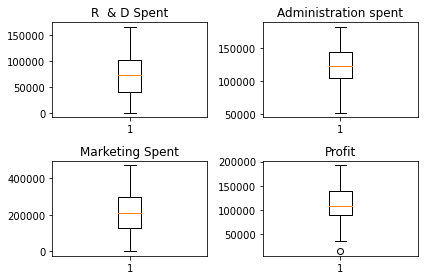

In [9]:
#fig = plt.figure(figsize=(10,60))

fig, axis = plt.subplots(nrows=2,ncols=2)
axis[0,0].boxplot(startup_df.R_DSpend)
axis[0,0].set_title('R  & D Spent')
axis[0,1].boxplot(startup_df.Administration)
axis[0,1].set_title('Administration spent')
axis[1,0].boxplot(startup_df.MarketingSpend)
axis[1,0].set_title('Marketing Spent')
axis[1,1].boxplot(startup_df.Profit)
axis[1,1].set_title('Profit')
fig.tight_layout()

#
CORRELATION AND LINEARITY TEST

In [10]:
startup_df.corr()

,R_DSpend,Administration,MarketingSpend,Profit
R_DSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


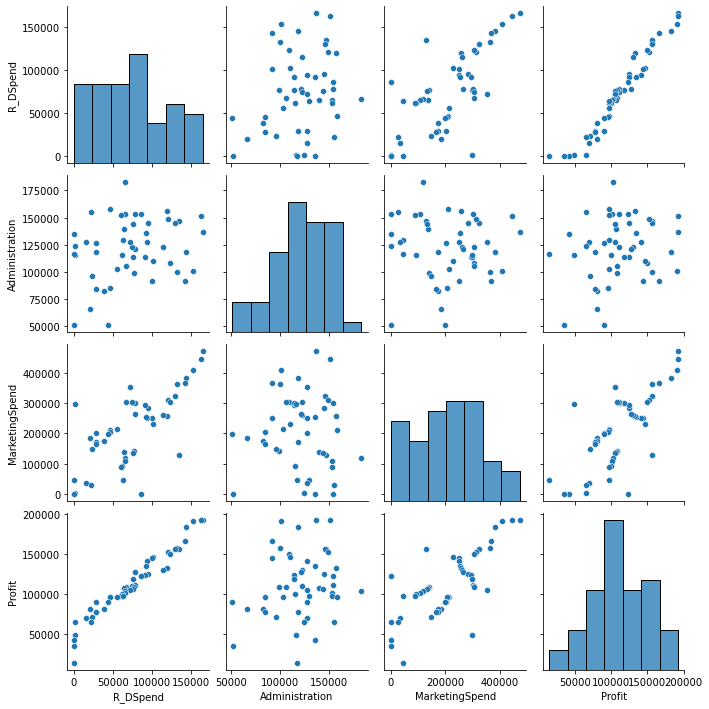

In [11]:
sns.pairplot(startup_df)

In [30]:
### MarketSpend and R&D  have good correlation coefficient and hence one can be removed in the model

#
BUILDING MODEL

In [12]:
model_basic=smf.ols('Profit~R_DSpend+Administration+MarketingSpend',data=startup_df).fit()
predicted_basic=model_basic.predict(startup_df)
model_basic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           4.53e-30
Time:                        16:47:17   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_DSpend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
error_basic=startup_df.Profit-predicted_basic
error_basic.sum()

1.979060471057892e-09

#
RMSE AND VIF METHODS


In [14]:
def RMSE(actual,predicted):
    error=actual-predicted
    rmse_value=np.sqrt(np.mean(error*error))
    return rmse_value

def vif(rSquared):
    vif_value=1/(1-rSquared)
    return vif_value

    

In [15]:
RMSE_basic=RMSE(startup_df.Profit,predicted_basic)
#vif_basic=vif(model_basic.rsquared)
RMSE_basic

8855.344489015142

In [16]:
# Since Administration has a probability value more it has no significance

# BUILDING MODEL BY REMOVING THE ADMINISTRATION FROM INPUT

In [17]:
model_rem_admin=smf.ols('Profit~R_DSpend+MarketingSpend',data=startup_df).fit()
predict_rem_admin=model_rem_admin.predict(startup_df)
model_rem_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           2.16e-31
Time:                        16:47:18   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R_DSpend           0.7966      0.041     19.266      0.000       0.713       0.880
MarketingSpend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
RMSE_rem_admin=RMSE(startup_df.Profit,predict_rem_admin)
RMSE_rem_admin

8881.885892449169

In [19]:
model_rem_admin_market=smf.ols('Profit~R_DSpend',data=startup_df).fit()
predict_rem_admin_market=model_rem_admin_market.predict(startup_df)
model_rem_admin_market.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           3.50e-32
Time:                        16:47:19   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R_DSpend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
RMSE_rem_admin_market=RMSE(startup_df.Profit,predict_rem_admin_market)
RMSE_rem_admin_market

9226.100548285232

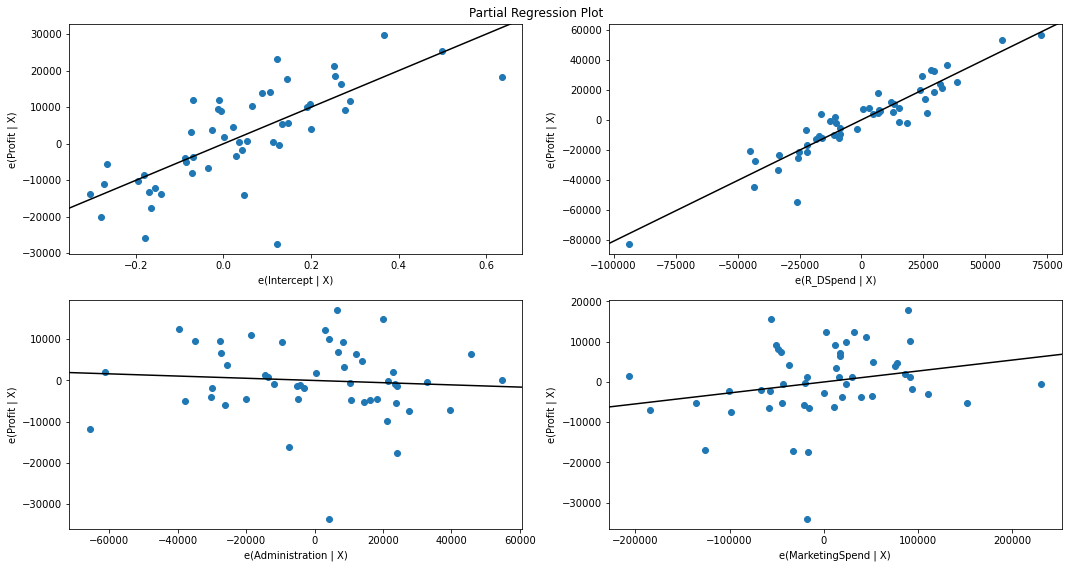

In [21]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_partregress_grid(model_basic, fig=fig)
plt.show()

# COOKS Distance and H leverage to remove row outliers

In [22]:
model_influence=model_rem_admin_market.get_influence()
(cooks_values,_)=model_influence.cooks_distance
cooks_values

array([2.75252280e-03, 9.89908565e-03, 6.51765486e-02, 4.92628317e-02,
       7.59828403e-03, 7.33387104e-03, 2.21412554e-02, 6.73661506e-03,
       1.01619773e-05, 5.81403631e-03, 1.66061312e-02, 1.36996956e-02,
       2.16575937e-02, 6.13884016e-03, 8.90397517e-02, 6.30133674e-02,
       1.51718150e-02, 2.94329347e-03, 1.35430569e-03, 8.88551585e-07,
       2.17640968e-03, 2.60842890e-03, 4.21074221e-04, 4.82942604e-04,
       4.68512581e-03, 1.19729011e-03, 6.88519548e-03, 3.72111671e-03,
       5.73468418e-04, 2.01430573e-03, 5.31240320e-04, 1.80999487e-03,
       4.12635748e-03, 1.56789281e-05, 1.04277371e-02, 1.08303093e-02,
       7.16494391e-02, 1.81926575e-03, 6.59971284e-02, 1.80059405e-04,
       5.21569633e-03, 6.02155910e-03, 1.40828291e-03, 1.85762695e-02,
       2.18683314e-03, 1.05297577e-01, 2.04992283e-04, 1.99584124e-02,
       8.98899423e-02, 5.62061026e-01])

Text(0, 0.5, 'cooks values')

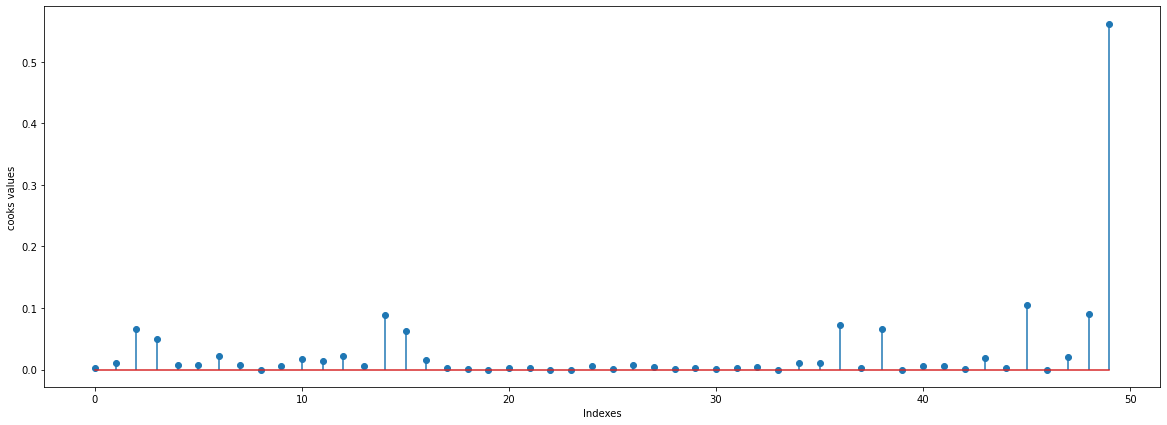

In [23]:
#Ploting the cooks values 
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup_df)),np.round(cooks_values,3))
plt.xlabel('Indexes')
plt.ylabel('cooks values')

In [24]:
(np.argmax(cooks_values),np.max(cooks_values))

(49, 0.5620610259264268)

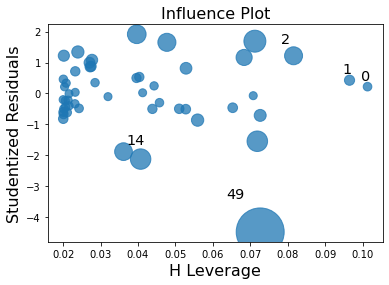

In [25]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model_rem_admin_market)
plt.show()

In [26]:
k=startup_df.shape[1]
r=startup_df.shape[0]
leverage_cutoff = 3*((k + 1)/r)
leverage_cutoff

0.36

# THERE ARE NOT MANY OUTLIERS .SO, WE CAN SAY THAT THE PREVIOUS MODEL IS THE FINAL MODEL

In [27]:
df_RMSE={'RMSE':['RMSE_basic','RMSE_rem_admin','RMSE_rem_admin_market'],
         'values':[RMSE_basic,RMSE_rem_admin,RMSE_rem_admin_market]}
rmse_df=pd.DataFrame(df_RMSE)
rmse_df

,RMSE,values
0,RMSE_basic,8855.344489
1,RMSE_rem_admin,8881.885892
2,RMSE_rem_admin_market,9226.100548


In [28]:
df_rsq={'R^2':['R^2_basic','R^2_rem_admin','R^2_rem_admin_market'],
        'values':[model_basic.rsquared,model_rem_admin.rsquared,model_rem_admin_market.rsquared]}
rsq_df=pd.DataFrame(df_rsq)
rsq_df

,R^2,values
0,R^2_basic,0.950746
1,R^2_rem_admin,0.950450
2,R^2_rem_admin_market,0.946535


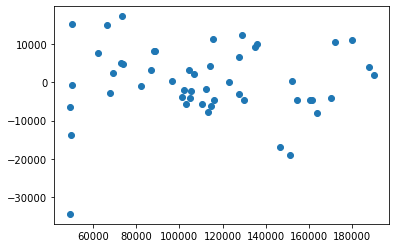

In [29]:
plt.scatter(predict_rem_admin_market,startup_df.Profit-predict_rem_admin_market)